In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

41


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52153 stdev: 0.09325
Best fitness: 0.68646 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.257
Mean genetic distance 2.980, standard deviation 0.516
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.207 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55551 stdev: 0.09310
Best fitness: 0.72789 - size: (3, 15) - species 2 - id 314
Average adjusted fitness: 0.218
Mean genetic distance 3.036, standard deviation 0.514
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 30.329 sec (25.768 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57075 stdev: 0.09069
Best fitness: 0.74273 - size: (4, 16) - species 6 - id 495
Average adjusted fitness: 0.272
Mean genetic distance 3.016, standard deviation 0.505
Population of 201 members in 24 species


Population's average fitness: 0.63697 stdev: 0.09752
Best fitness: 0.78231 - size: (5, 17) - species 29 - id 2235
Average adjusted fitness: 0.250
Mean genetic distance 3.273, standard deviation 0.545
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 11.914 sec (11.531 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63588 stdev: 0.09765
Best fitness: 0.78231 - size: (5, 17) - species 29 - id 2235
Average adjusted fitness: 0.242
Mean genetic distance 3.256, standard deviation 0.551
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 13.042 sec (11.735 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62210 stdev: 0.11656
Best fitness: 0.78231 - size: (5, 17) - species 29 - id 2235
Average adjusted fitness: 0.263
Mean genetic distance 3.234, standard deviation 0.537
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 11.227 sec (11.752 average)

 

Population's average fitness: 0.63013 stdev: 0.10878
Best fitness: 0.79344 - size: (3, 15) - species 6 - id 536
Average adjusted fitness: 0.297
Mean genetic distance 3.224, standard deviation 0.488
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 8.388 sec (9.989 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63620 stdev: 0.11531
Best fitness: 0.79963 - size: (4, 16) - species 6 - id 2644
Average adjusted fitness: 0.299
Mean genetic distance 3.224, standard deviation 0.488
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.009 sec (9.776 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64149 stdev: 0.10671
Best fitness: 0.79963 - size: (4, 16) - species 6 - id 2644
Average adjusted fitness: 0.302
Mean genetic distance 3.242, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.808 sec (9.663 average)

 ****** Run

Population's average fitness: 0.58836 stdev: 0.06936
Best fitness: 0.71490 - size: (4, 17) - species 5 - id 747
Average adjusted fitness: 0.162
Mean genetic distance 3.204, standard deviation 0.514
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.646 sec (7.656 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58830 stdev: 0.07173
Best fitness: 0.71490 - size: (4, 17) - species 5 - id 747
Average adjusted fitness: 0.187
Mean genetic distance 3.207, standard deviation 0.510
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.877 sec (7.714 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59126 stdev: 0.07081
Best fitness: 0.71490 - size: (4, 17) - species 5 - id 747
Average adjusted fitness: 0.163
Mean genetic distance 3.248, standard deviation 0.515
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.817 sec (7.749 average)

 ****** Runni

Population's average fitness: 0.58896 stdev: 0.08184
Best fitness: 0.71367 - size: (3, 15) - species 3 - id 943
Average adjusted fitness: 0.219
Mean genetic distance 3.162, standard deviation 0.474
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.636 sec (7.426 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59506 stdev: 0.08394
Best fitness: 0.72233 - size: (6, 21) - species 32 - id 1175
Average adjusted fitness: 0.263
Mean genetic distance 3.133, standard deviation 0.473
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 7.637 sec (7.452 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59429 stdev: 0.08436
Best fitness: 0.72233 - size: (6, 21) - species 32 - id 1175
Average adjusted fitness: 0.220
Mean genetic distance 3.130, standard deviation 0.471
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 8.064 sec (7.520 average)

 ****** Run

Population's average fitness: 0.51734 stdev: 0.08554
Best fitness: 0.67100 - size: (2, 13) - species 5 - id 106
Average adjusted fitness: 0.184
Mean genetic distance 2.908, standard deviation 0.472
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.302 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55384 stdev: 0.08024
Best fitness: 0.70439 - size: (3, 14) - species 7 - id 234
Average adjusted fitness: 0.203
Mean genetic distance 2.948, standard deviation 0.447
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.633 sec (6.468 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55801 stdev: 0.08187
Best fitness: 0.70439 - size: (3, 14) - species 7 - id 234
Average adjusted fitness: 0.212
Mean genetic distance 2.994, standard deviation 0.476
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.873 sec (6.603 average)

 ****** Running generation 3 **

Population's average fitness: 0.60780 stdev: 0.09330
Best fitness: 0.75387 - size: (5, 20) - species 34 - id 2906
Average adjusted fitness: 0.228
Mean genetic distance 3.271, standard deviation 0.528
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.954 sec (8.367 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61043 stdev: 0.09581
Best fitness: 0.75387 - size: (5, 20) - species 34 - id 2906
Average adjusted fitness: 0.272
Mean genetic distance 3.248, standard deviation 0.517
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.230 sec (8.474 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60930 stdev: 0.10228
Best fitness: 0.75387 - size: (5, 20) - species 34 - id 2906
Average adjusted fitness: 0.230
Mean genetic distance 3.295, standard deviation 0.512
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 9.388 sec (8.629 average)

 ******

Population's average fitness: 0.61242 stdev: 0.09933
Best fitness: 0.74644 - size: (4, 18) - species 31 - id 808
Average adjusted fitness: 0.295
Mean genetic distance 3.299, standard deviation 0.487
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.195 sec (8.450 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62176 stdev: 0.09290
Best fitness: 0.74644 - size: (4, 18) - species 31 - id 808
Average adjusted fitness: 0.330
Mean genetic distance 3.305, standard deviation 0.482
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.180 sec (8.414 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61293 stdev: 0.10052
Best fitness: 0.74644 - size: (4, 18) - species 31 - id 808
Average adjusted fitness: 0.342
Mean genetic distance 3.330, standard deviation 0.483
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 8.353 sec (8.438 average)

 ****** Ru

Population's average fitness: 0.62110 stdev: 0.09224
Best fitness: 0.76747 - size: (5, 21) - species 38 - id 1423
Average adjusted fitness: 0.242
Mean genetic distance 3.200, standard deviation 0.465
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 7.940 sec (7.759 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62764 stdev: 0.09178
Best fitness: 0.76994 - size: (4, 16) - species 16 - id 1850
Average adjusted fitness: 0.248
Mean genetic distance 3.200, standard deviation 0.473
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 8.435 sec (7.886 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63160 stdev: 0.09341
Best fitness: 0.77180 - size: (5, 21) - species 35 - id 1997
Average adjusted fitness: 0.277
Mean genetic distance 3.228, standard deviation 0.468
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 8.021 sec (7.938 average)

 ******

Population's average fitness: 0.59765 stdev: 0.08606
Best fitness: 0.76129 - size: (5, 18) - species 13 - id 1092
Average adjusted fitness: 0.195
Mean genetic distance 3.166, standard deviation 0.481
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.651 sec (7.084 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59873 stdev: 0.08516
Best fitness: 0.76129 - size: (5, 18) - species 13 - id 1092
Average adjusted fitness: 0.202
Mean genetic distance 3.194, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.661 sec (7.156 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60595 stdev: 0.08411
Best fitness: 0.76129 - size: (5, 18) - species 13 - id 1092
Average adjusted fitness: 0.217
Mean genetic distance 3.184, standard deviation 0.495
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.775 sec (7.225 average)

 ****** R

Population's average fitness: 0.52087 stdev: 0.08927
Best fitness: 0.72789 - size: (2, 13) - species 5 - id 73
Average adjusted fitness: 0.251
Mean genetic distance 2.952, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56008 stdev: 0.08642
Best fitness: 0.77613 - size: (3, 15) - species 5 - id 371
Average adjusted fitness: 0.287
Mean genetic distance 3.046, standard deviation 0.481
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.668 sec (6.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56882 stdev: 0.09850
Best fitness: 0.80767 - size: (3, 16) - species 5 - id 543
Average adjusted fitness: 0.241
Mean genetic distance 3.058, standard deviation 0.498
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.972 sec (6.634 average)

 ****** Running generation 3 ***

Population's average fitness: 0.63372 stdev: 0.11763
Best fitness: 0.83735 - size: (4, 18) - species 5 - id 3232
Average adjusted fitness: 0.263
Mean genetic distance 3.200, standard deviation 0.483
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.597 sec (8.283 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64954 stdev: 0.10897
Best fitness: 0.83735 - size: (4, 18) - species 5 - id 3232
Average adjusted fitness: 0.385
Mean genetic distance 3.206, standard deviation 0.476
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.662 sec (8.357 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64761 stdev: 0.10839
Best fitness: 0.83735 - size: (4, 18) - species 5 - id 3232
Average adjusted fitness: 0.308
Mean genetic distance 3.179, standard deviation 0.475
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.063 sec (8.458 average)

 ****** Ru

Population's average fitness: 0.58311 stdev: 0.06954
Best fitness: 0.73036 - size: (6, 22) - species 6 - id 2440
Average adjusted fitness: 0.208
Mean genetic distance 3.235, standard deviation 0.496
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 8.444 sec (8.295 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58155 stdev: 0.07259
Best fitness: 0.73036 - size: (6, 22) - species 6 - id 2440
Average adjusted fitness: 0.207
Mean genetic distance 3.235, standard deviation 0.508
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.812 sec (8.349 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58086 stdev: 0.07720
Best fitness: 0.73036 - size: (6, 22) - species 6 - id 2440
Average adjusted fitness: 0.208
Mean genetic distance 3.248, standard deviation 0.506
Population of 189 members in 38 species
Total extinctions: 0
Generation time: 8.445 sec (8.358 average)

 ****** Ru

Population's average fitness: 0.60768 stdev: 0.08148
Best fitness: 0.77984 - size: (7, 21) - species 6 - id 1564
Average adjusted fitness: 0.217
Mean genetic distance 3.238, standard deviation 0.469
Population of 212 members in 50 species
Total extinctions: 0
Generation time: 8.419 sec (7.711 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60274 stdev: 0.08793
Best fitness: 0.77984 - size: (7, 21) - species 6 - id 1564
Average adjusted fitness: 0.264
Mean genetic distance 3.252, standard deviation 0.474
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 9.461 sec (7.928 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60464 stdev: 0.08866
Best fitness: 0.77984 - size: (7, 21) - species 6 - id 1564
Average adjusted fitness: 0.238
Mean genetic distance 3.268, standard deviation 0.478
Population of 203 members in 50 species
Total extinctions: 0
Generation time: 8.070 sec (7.998 average)

 ****** Ru

Population's average fitness: 0.58216 stdev: 0.08956
Best fitness: 0.76871 - size: (4, 16) - species 24 - id 955
Average adjusted fitness: 0.239
Mean genetic distance 3.134, standard deviation 0.514
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.695 sec (7.122 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58410 stdev: 0.09678
Best fitness: 0.76871 - size: (4, 16) - species 24 - id 955
Average adjusted fitness: 0.224
Mean genetic distance 3.147, standard deviation 0.502
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.771 sec (7.203 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59160 stdev: 0.09374
Best fitness: 0.76871 - size: (4, 16) - species 24 - id 955
Average adjusted fitness: 0.204
Mean genetic distance 3.174, standard deviation 0.495
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 8.016 sec (7.294 average)

 ****** Runn

Population's average fitness: 0.51701 stdev: 0.09108
Best fitness: 0.68151 - size: (2, 13) - species 4 - id 80
Average adjusted fitness: 0.237
Mean genetic distance 3.042, standard deviation 0.535
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.250 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55291 stdev: 0.09035
Best fitness: 0.70934 - size: (3, 15) - species 2 - id 266
Average adjusted fitness: 0.224
Mean genetic distance 3.063, standard deviation 0.506
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.666 sec (6.458 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57396 stdev: 0.08816
Best fitness: 0.72975 - size: (4, 17) - species 4 - id 514
Average adjusted fitness: 0.205
Mean genetic distance 3.077, standard deviation 0.502
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.902 sec (6.606 average)

 ****** Running generation 3 ***

Population's average fitness: 0.62613 stdev: 0.09605
Best fitness: 0.76562 - size: (5, 19) - species 8 - id 3188
Average adjusted fitness: 0.236
Mean genetic distance 3.317, standard deviation 0.473
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.551 sec (8.442 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63499 stdev: 0.08777
Best fitness: 0.76562 - size: (5, 19) - species 8 - id 3188
Average adjusted fitness: 0.278
Mean genetic distance 3.306, standard deviation 0.468
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.660 sec (8.466 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62358 stdev: 0.10404
Best fitness: 0.76562 - size: (5, 19) - species 8 - id 3188
Average adjusted fitness: 0.297
Mean genetic distance 3.326, standard deviation 0.484
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 14.759 sec (9.128 average)

 ****** R

Population's average fitness: 0.60969 stdev: 0.09076
Best fitness: 0.78912 - size: (4, 18) - species 21 - id 1997
Average adjusted fitness: 0.198
Mean genetic distance 3.257, standard deviation 0.503
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.500 sec (8.297 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62292 stdev: 0.09044
Best fitness: 0.78912 - size: (4, 18) - species 21 - id 1997
Average adjusted fitness: 0.193
Mean genetic distance 3.244, standard deviation 0.498
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.435 sec (8.360 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62199 stdev: 0.09272
Best fitness: 0.79283 - size: (4, 19) - species 21 - id 2909
Average adjusted fitness: 0.220
Mean genetic distance 3.254, standard deviation 0.505
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.810 sec (8.454 average)

 ******

Population's average fitness: 0.64669 stdev: 0.15084
Best fitness: 0.81633 - size: (4, 18) - species 36 - id 947
Average adjusted fitness: 0.421
Mean genetic distance 3.204, standard deviation 0.466
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 8.327 sec (7.975 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65664 stdev: 0.14795
Best fitness: 0.81633 - size: (4, 18) - species 36 - id 947
Average adjusted fitness: 0.381
Mean genetic distance 3.187, standard deviation 0.460
Population of 213 members in 43 species
Total extinctions: 0
Generation time: 8.552 sec (8.105 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64744 stdev: 0.15337
Best fitness: 0.81633 - size: (4, 18) - species 36 - id 947
Average adjusted fitness: 0.373
Mean genetic distance 3.207, standard deviation 0.469
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 9.069 sec (8.283 average)

 ****** Ru

Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.515 sec (7.107 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58462 stdev: 0.08298
Best fitness: 0.74583 - size: (5, 20) - species 17 - id 1258
Average adjusted fitness: 0.232
Mean genetic distance 3.078, standard deviation 0.509
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.620 sec (7.171 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58191 stdev: 0.08449
Best fitness: 0.74583 - size: (5, 20) - species 17 - id 1258
Average adjusted fitness: 0.237
Mean genetic distance 3.101, standard deviation 0.482
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.731 sec (7.233 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58798 stdev: 0.08272
Best fitness: 0.74583 - size: (5, 20) - species 17 - id 1258
Average adjusted fitness: 0.255
Mean genetic distance 3.1

Population's average fitness: 0.54456 stdev: 0.09467
Best fitness: 0.75881 - size: (2, 14) - species 6 - id 361
Average adjusted fitness: 0.236
Mean genetic distance 3.086, standard deviation 0.525
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.641 sec (6.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57127 stdev: 0.09177
Best fitness: 0.75881 - size: (2, 14) - species 6 - id 361
Average adjusted fitness: 0.301
Mean genetic distance 3.118, standard deviation 0.477
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.865 sec (6.607 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57537 stdev: 0.09250
Best fitness: 0.77242 - size: (3, 16) - species 27 - id 593
Average adjusted fitness: 0.244
Mean genetic distance 3.084, standard deviation 0.492
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.310 sec (6.783 average)

 ****** Runnin

Population's average fitness: 0.64466 stdev: 0.10224
Best fitness: 0.81138 - size: (7, 21) - species 28 - id 3105
Average adjusted fitness: 0.272
Mean genetic distance 3.378, standard deviation 0.469
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.127 sec (8.653 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63905 stdev: 0.10643
Best fitness: 0.81138 - size: (7, 21) - species 28 - id 3105
Average adjusted fitness: 0.266
Mean genetic distance 3.371, standard deviation 0.463
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 9.023 sec (8.722 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63014 stdev: 0.10917
Best fitness: 0.81138 - size: (7, 21) - species 28 - id 3105
Average adjusted fitness: 0.256
Mean genetic distance 3.368, standard deviation 0.467
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 8.896 sec (8.804 average)

 ******

Generation time: 7.975 sec (8.264 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78296 stdev: 0.23932
Best fitness: 0.93878 - size: (2, 13) - species 24 - id 109
Average adjusted fitness: 0.667
Mean genetic distance 3.240, standard deviation 0.534
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 7.883 sec (8.271 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.79219 stdev: 0.22786
Best fitness: 0.93878 - size: (2, 13) - species 24 - id 109
Average adjusted fitness: 0.700
Mean genetic distance 3.256, standard deviation 0.544
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 8.645 sec (8.304 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.79788 stdev: 0.20943
Best fitness: 0.93878 - size: (2, 13) - species 24 - id 109
Average adjusted fitness: 0.663
Mean genetic distance 3.247, standard deviation 0.552
Population of 193 members in 24 

Population's average fitness: 0.61637 stdev: 0.09372
Best fitness: 0.77304 - size: (7, 23) - species 23 - id 1208
Average adjusted fitness: 0.234
Mean genetic distance 3.120, standard deviation 0.503
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.026 sec (7.889 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61344 stdev: 0.09487
Best fitness: 0.77304 - size: (7, 23) - species 23 - id 1208
Average adjusted fitness: 0.312
Mean genetic distance 3.133, standard deviation 0.508
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.208 sec (7.937 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61136 stdev: 0.09611
Best fitness: 0.77304 - size: (7, 23) - species 23 - id 1208
Average adjusted fitness: 0.242
Mean genetic distance 3.122, standard deviation 0.506
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 8.332 sec (8.011 average)

 ******

Population's average fitness: 0.62469 stdev: 0.11659
Best fitness: 0.86333 - size: (5, 18) - species 26 - id 1181
Average adjusted fitness: 0.368
Mean genetic distance 3.218, standard deviation 0.491
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.724 sec (7.260 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64431 stdev: 0.10971
Best fitness: 0.86333 - size: (5, 18) - species 26 - id 1181
Average adjusted fitness: 0.306
Mean genetic distance 3.231, standard deviation 0.488
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.834 sec (7.317 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63377 stdev: 0.11586
Best fitness: 0.86333 - size: (5, 18) - species 26 - id 1181
Average adjusted fitness: 0.274
Mean genetic distance 3.245, standard deviation 0.490
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.943 sec (7.485 average)

 ****** 

Mean genetic distance 2.993, standard deviation 0.482
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.926 sec (6.733 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55985 stdev: 0.07969
Best fitness: 0.70996 - size: (3, 14) - species 21 - id 499
Average adjusted fitness: 0.204
Mean genetic distance 3.043, standard deviation 0.469
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.204 sec (6.851 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57477 stdev: 0.07445
Best fitness: 0.72418 - size: (4, 16) - species 34 - id 793
Average adjusted fitness: 0.220
Mean genetic distance 3.109, standard deviation 0.487
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.560 sec (6.993 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57014 stdev: 0.08099
Best fitness: 0.72418 - size: (4, 16) - species 34 - id 793
Averag

Mean genetic distance 3.247, standard deviation 0.515
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.506 sec (8.320 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59416 stdev: 0.09275
Best fitness: 0.75572 - size: (4, 17) - species 34 - id 2218
Average adjusted fitness: 0.248
Mean genetic distance 3.256, standard deviation 0.524
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.691 sec (8.392 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59416 stdev: 0.09444
Best fitness: 0.75572 - size: (4, 17) - species 34 - id 2218
Average adjusted fitness: 0.222
Mean genetic distance 3.264, standard deviation 0.510
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.696 sec (8.437 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59544 stdev: 0.09408
Best fitness: 0.75572 - size: (4, 17) - species 34 - id 2218


Mean genetic distance 3.319, standard deviation 0.478
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.068 sec (8.370 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63833 stdev: 0.12132
Best fitness: 0.82993 - size: (8, 26) - species 9 - id 2501
Average adjusted fitness: 0.375
Mean genetic distance 3.340, standard deviation 0.483
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.398 sec (8.419 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65657 stdev: 0.10951
Best fitness: 0.82993 - size: (8, 26) - species 9 - id 2501
Average adjusted fitness: 0.318
Mean genetic distance 3.347, standard deviation 0.491
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.313 sec (8.316 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65167 stdev: 0.11666
Best fitness: 0.82993 - size: (8, 26) - species 9 - id 2501
Ave

Mean genetic distance 3.071, standard deviation 0.497
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.064 sec (7.676 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78440 stdev: 0.23554
Best fitness: 0.91837 - size: (3, 15) - species 6 - id 1392
Average adjusted fitness: 0.670
Mean genetic distance 3.073, standard deviation 0.495
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.160 sec (7.744 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.79700 stdev: 0.22649
Best fitness: 0.91837 - size: (3, 15) - species 6 - id 1392
Average adjusted fitness: 0.704
Mean genetic distance 3.077, standard deviation 0.511
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.013 sec (7.767 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.78476 stdev: 0.23196
Best fitness: 0.91837 - size: (3, 15) - species 6 - id 1392
Ave

Mean genetic distance 3.189, standard deviation 0.485
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.132 sec (7.305 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59374 stdev: 0.09116
Best fitness: 0.73655 - size: (6, 19) - species 35 - id 1044
Average adjusted fitness: 0.196
Mean genetic distance 3.219, standard deviation 0.499
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.971 sec (7.371 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59205 stdev: 0.09917
Best fitness: 0.73655 - size: (6, 19) - species 35 - id 1044
Average adjusted fitness: 0.247
Mean genetic distance 3.219, standard deviation 0.491
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.074 sec (7.550 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59192 stdev: 0.09742
Best fitness: 0.73655 - size: (6, 19) - species 35 - id 1044
A


 ****** Running generation 3 ****** 

Population's average fitness: 0.63698 stdev: 0.11261
Best fitness: 0.75510 - size: (3, 14) - species 6 - id 687
Average adjusted fitness: 0.342
Mean genetic distance 3.027, standard deviation 0.472
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.283 sec (6.788 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64116 stdev: 0.12414
Best fitness: 0.78046 - size: (4, 16) - species 18 - id 849
Average adjusted fitness: 0.330
Mean genetic distance 3.047, standard deviation 0.479
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.480 sec (6.927 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61802 stdev: 0.13439
Best fitness: 0.78046 - size: (4, 16) - species 18 - id 849
Average adjusted fitness: 0.334
Mean genetic distance 3.065, standard deviation 0.492
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 7

Population's average fitness: 0.65499 stdev: 0.14051
Best fitness: 0.79777 - size: (6, 22) - species 35 - id 3361
Average adjusted fitness: 0.389
Mean genetic distance 3.274, standard deviation 0.506
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.026 sec (8.489 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64398 stdev: 0.14462
Best fitness: 0.79777 - size: (6, 22) - species 35 - id 3361
Average adjusted fitness: 0.361
Mean genetic distance 3.260, standard deviation 0.505
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 9.240 sec (8.578 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64812 stdev: 0.14299
Best fitness: 0.79777 - size: (6, 22) - species 35 - id 3361
Average adjusted fitness: 0.348
Mean genetic distance 3.286, standard deviation 0.504
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 8.923 sec (8.625 average)
running:

Population's average fitness: 0.64485 stdev: 0.11531
Best fitness: 0.85838 - size: (5, 19) - species 19 - id 2088
Average adjusted fitness: 0.294
Mean genetic distance 3.240, standard deviation 0.448
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.966 sec (8.541 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62894 stdev: 0.12734
Best fitness: 0.85838 - size: (5, 19) - species 19 - id 2088
Average adjusted fitness: 0.312
Mean genetic distance 3.220, standard deviation 0.453
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.735 sec (8.586 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63101 stdev: 0.12909
Best fitness: 0.85838 - size: (5, 19) - species 19 - id 2088
Average adjusted fitness: 0.284
Mean genetic distance 3.223, standard deviation 0.464
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.592 sec (8.619 average)

 ******

Population's average fitness: 0.59628 stdev: 0.09099
Best fitness: 0.73098 - size: (5, 16) - species 22 - id 2023
Average adjusted fitness: 0.223
Mean genetic distance 3.192, standard deviation 0.480
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 7.994 sec (8.028 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59358 stdev: 0.09126
Best fitness: 0.73098 - size: (5, 16) - species 22 - id 2023
Average adjusted fitness: 0.219
Mean genetic distance 3.207, standard deviation 0.483
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.326 sec (8.068 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58797 stdev: 0.09308
Best fitness: 0.73098 - size: (5, 16) - species 22 - id 2023
Average adjusted fitness: 0.230
Mean genetic distance 3.208, standard deviation 0.483
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.034 sec (8.065 average)

 ******

Population's average fitness: 0.62527 stdev: 0.09935
Best fitness: 0.81385 - size: (4, 19) - species 29 - id 1192
Average adjusted fitness: 0.236
Mean genetic distance 3.223, standard deviation 0.497
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.029 sec (7.412 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62454 stdev: 0.10138
Best fitness: 0.81385 - size: (4, 19) - species 29 - id 1192
Average adjusted fitness: 0.255
Mean genetic distance 3.233, standard deviation 0.497
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.025 sec (7.591 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62006 stdev: 0.10246
Best fitness: 0.81385 - size: (4, 19) - species 29 - id 1192
Average adjusted fitness: 0.275
Mean genetic distance 3.216, standard deviation 0.507
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.476 sec (7.754 average)

 ******

Population's average fitness: 0.64294 stdev: 0.13235
Best fitness: 0.84106 - size: (3, 14) - species 23 - id 362
Average adjusted fitness: 0.383
Mean genetic distance 3.131, standard deviation 0.507
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.366 sec (6.812 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62551 stdev: 0.14894
Best fitness: 0.86395 - size: (2, 14) - species 2 - id 793
Average adjusted fitness: 0.333
Mean genetic distance 3.129, standard deviation 0.512
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.205 sec (6.891 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66216 stdev: 0.12670
Best fitness: 0.86395 - size: (2, 14) - species 2 - id 793
Average adjusted fitness: 0.425
Mean genetic distance 3.169, standard deviation 0.509
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.444 sec (6.983 average)

 ****** Runnin

Population's average fitness: 0.68502 stdev: 0.13953
Best fitness: 0.88621 - size: (3, 16) - species 2 - id 2057
Average adjusted fitness: 0.467
Mean genetic distance 3.322, standard deviation 0.474
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 8.702 sec (9.054 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67667 stdev: 0.14350
Best fitness: 0.88621 - size: (3, 16) - species 2 - id 2057
Average adjusted fitness: 0.490
Mean genetic distance 3.335, standard deviation 0.479
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.834 sec (9.112 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69240 stdev: 0.13490
Best fitness: 0.88621 - size: (3, 16) - species 2 - id 2057
Average adjusted fitness: 0.456
Mean genetic distance 3.334, standard deviation 0.479
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.801 sec (9.153 average)
running:29/

Population's average fitness: 0.71143 stdev: 0.20069
Best fitness: 0.85962 - size: (8, 26) - species 47 - id 2360
Average adjusted fitness: 0.563
Mean genetic distance 3.212, standard deviation 0.494
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.650 sec (8.100 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70203 stdev: 0.21106
Best fitness: 0.85962 - size: (5, 21) - species 21 - id 2745
Average adjusted fitness: 0.538
Mean genetic distance 3.239, standard deviation 0.487
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.643 sec (8.167 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70942 stdev: 0.20222
Best fitness: 0.85962 - size: (5, 21) - species 21 - id 2745
Average adjusted fitness: 0.541
Mean genetic distance 3.271, standard deviation 0.465
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.822 sec (8.240 average)

 ******

Population's average fitness: 0.59139 stdev: 0.07521
Best fitness: 0.77489 - size: (3, 15) - species 23 - id 1157
Average adjusted fitness: 0.221
Mean genetic distance 3.084, standard deviation 0.478
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 7.415 sec (7.718 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58590 stdev: 0.07498
Best fitness: 0.77489 - size: (3, 15) - species 23 - id 1157
Average adjusted fitness: 0.147
Mean genetic distance 3.089, standard deviation 0.475
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.912 sec (7.764 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59168 stdev: 0.07408
Best fitness: 0.77489 - size: (3, 15) - species 23 - id 1157
Average adjusted fitness: 0.130
Mean genetic distance 3.116, standard deviation 0.487
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.004 sec (7.809 average)

 ******

Population's average fitness: 0.65128 stdev: 0.12361
Best fitness: 0.87137 - size: (7, 19) - species 1 - id 1142
Average adjusted fitness: 0.338
Mean genetic distance 3.242, standard deviation 0.473
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 7.951 sec (7.885 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64386 stdev: 0.12921
Best fitness: 0.87137 - size: (7, 19) - species 1 - id 1142
Average adjusted fitness: 0.337
Mean genetic distance 3.234, standard deviation 0.472
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 8.030 sec (8.024 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63490 stdev: 0.14330
Best fitness: 0.87137 - size: (7, 19) - species 1 - id 1142
Average adjusted fitness: 0.320
Mean genetic distance 3.238, standard deviation 0.474
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 8.272 sec (8.142 average)

 ****** Ru

Population's average fitness: 0.56145 stdev: 0.11223
Best fitness: 0.81509 - size: (2, 12) - species 19 - id 650
Average adjusted fitness: 0.336
Mean genetic distance 3.127, standard deviation 0.466
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.622 sec (7.109 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57988 stdev: 0.10524
Best fitness: 0.81509 - size: (2, 12) - species 19 - id 650
Average adjusted fitness: 0.271
Mean genetic distance 3.161, standard deviation 0.471
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.805 sec (7.248 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59444 stdev: 0.10807
Best fitness: 0.81509 - size: (2, 12) - species 19 - id 650
Average adjusted fitness: 0.335
Mean genetic distance 3.211, standard deviation 0.480
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.432 sec (7.279 average)

 ****** Runn

Population's average fitness: 0.63642 stdev: 0.13856
Best fitness: 0.84292 - size: (3, 13) - species 19 - id 2646
Average adjusted fitness: 0.366
Mean genetic distance 3.363, standard deviation 0.504
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.377 sec (8.539 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64752 stdev: 0.12785
Best fitness: 0.84292 - size: (3, 13) - species 19 - id 2646
Average adjusted fitness: 0.330
Mean genetic distance 3.363, standard deviation 0.518
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.690 sec (8.568 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65459 stdev: 0.12883
Best fitness: 0.84292 - size: (3, 13) - species 19 - id 2646
Average adjusted fitness: 0.330
Mean genetic distance 3.343, standard deviation 0.515
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.723 sec (8.589 average)
running:

Population's average fitness: 0.59333 stdev: 0.08216
Best fitness: 0.75263 - size: (8, 23) - species 27 - id 2612
Average adjusted fitness: 0.122
Mean genetic distance 3.265, standard deviation 0.491
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 8.365 sec (8.564 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58218 stdev: 0.08556
Best fitness: 0.75263 - size: (8, 23) - species 27 - id 2612
Average adjusted fitness: 0.193
Mean genetic distance 3.281, standard deviation 0.501
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.652 sec (8.640 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58849 stdev: 0.08546
Best fitness: 0.75263 - size: (8, 23) - species 27 - id 2612
Average adjusted fitness: 0.274
Mean genetic distance 3.274, standard deviation 0.500
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.697 sec (8.657 average)

 ******

Population's average fitness: 0.74314 stdev: 0.16563
Best fitness: 0.88250 - size: (6, 21) - species 34 - id 1646
Average adjusted fitness: 0.565
Mean genetic distance 3.183, standard deviation 0.457
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 8.954 sec (8.231 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74513 stdev: 0.16610
Best fitness: 0.88250 - size: (6, 21) - species 34 - id 1646
Average adjusted fitness: 0.589
Mean genetic distance 3.166, standard deviation 0.465
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 8.453 sec (8.328 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73983 stdev: 0.17870
Best fitness: 0.88250 - size: (6, 21) - species 34 - id 1646
Average adjusted fitness: 0.560
Mean genetic distance 3.185, standard deviation 0.477
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 8.573 sec (8.433 average)

 ******

Population's average fitness: 0.66858 stdev: 0.20687
Best fitness: 0.84416 - size: (4, 16) - species 35 - id 1078
Average adjusted fitness: 0.415
Mean genetic distance 3.146, standard deviation 0.522
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 7.814 sec (7.235 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66954 stdev: 0.20902
Best fitness: 0.84416 - size: (4, 16) - species 21 - id 1078
Average adjusted fitness: 0.427
Mean genetic distance 3.213, standard deviation 0.531
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.017 sec (7.401 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67211 stdev: 0.20641
Best fitness: 0.84416 - size: (4, 16) - species 21 - id 1078
Average adjusted fitness: 0.455
Mean genetic distance 3.178, standard deviation 0.517
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.169 sec (7.540 average)

 ******

Population's average fitness: 0.64636 stdev: 0.20510
Best fitness: 0.82931 - size: (3, 15) - species 17 - id 494
Average adjusted fitness: 0.423
Mean genetic distance 3.064, standard deviation 0.485
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.418 sec (6.968 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68283 stdev: 0.19267
Best fitness: 0.83859 - size: (6, 18) - species 30 - id 782
Average adjusted fitness: 0.465
Mean genetic distance 3.083, standard deviation 0.490
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.685 sec (7.111 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68680 stdev: 0.19354
Best fitness: 0.83859 - size: (6, 18) - species 30 - id 782
Average adjusted fitness: 0.477
Mean genetic distance 3.113, standard deviation 0.507
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.690 sec (7.208 average)

 ****** Runn

Population's average fitness: 0.69811 stdev: 0.19851
Best fitness: 0.86827 - size: (3, 15) - species 3 - id 3003
Average adjusted fitness: 0.499
Mean genetic distance 3.133, standard deviation 0.526
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.777 sec (8.321 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70278 stdev: 0.19698
Best fitness: 0.86827 - size: (3, 15) - species 3 - id 3003
Average adjusted fitness: 0.501
Mean genetic distance 3.100, standard deviation 0.520
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.654 sec (8.379 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70863 stdev: 0.18816
Best fitness: 0.86827 - size: (3, 15) - species 3 - id 3003
Average adjusted fitness: 0.511
Mean genetic distance 3.114, standard deviation 0.525
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 8.348 sec (8.376 average)
running:37/

Population's average fitness: 0.61680 stdev: 0.10026
Best fitness: 0.79592 - size: (5, 19) - species 38 - id 2822
Average adjusted fitness: 0.359
Mean genetic distance 3.270, standard deviation 0.506
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.613 sec (8.303 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61365 stdev: 0.09757
Best fitness: 0.79592 - size: (5, 19) - species 38 - id 2822
Average adjusted fitness: 0.244
Mean genetic distance 3.277, standard deviation 0.497
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.724 sec (8.348 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61579 stdev: 0.10332
Best fitness: 0.79592 - size: (5, 19) - species 38 - id 2822
Average adjusted fitness: 0.321
Mean genetic distance 3.307, standard deviation 0.490
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 8.589 sec (8.359 average)

 ******

Population's average fitness: 0.65732 stdev: 0.14824
Best fitness: 0.85838 - size: (5, 18) - species 3 - id 1800
Average adjusted fitness: 0.361
Mean genetic distance 3.203, standard deviation 0.475
Population of 207 members in 50 species
Total extinctions: 0
Generation time: 13.218 sec (9.010 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66564 stdev: 0.14345
Best fitness: 0.85838 - size: (5, 18) - species 3 - id 1800
Average adjusted fitness: 0.408
Mean genetic distance 3.210, standard deviation 0.479
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 8.510 sec (9.070 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66769 stdev: 0.14355
Best fitness: 0.85838 - size: (5, 18) - species 3 - id 1800
Average adjusted fitness: 0.412
Mean genetic distance 3.236, standard deviation 0.485
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.845 sec (9.087 average)

 ****** R

Population's average fitness: 0.65961 stdev: 0.15533
Best fitness: 0.85838 - size: (5, 21) - species 39 - id 1161
Average adjusted fitness: 0.388
Mean genetic distance 3.160, standard deviation 0.433
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 7.938 sec (7.496 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66678 stdev: 0.15726
Best fitness: 0.85838 - size: (5, 21) - species 39 - id 1161
Average adjusted fitness: 0.415
Mean genetic distance 3.152, standard deviation 0.434
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 8.150 sec (7.683 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68104 stdev: 0.15127
Best fitness: 0.85838 - size: (5, 21) - species 39 - id 1161
Average adjusted fitness: 0.494
Mean genetic distance 3.158, standard deviation 0.443
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 8.323 sec (7.839 average)

 ******

Population's average fitness: 0.56771 stdev: 0.07152
Best fitness: 0.73655 - size: (2, 13) - species 20 - id 154
Average adjusted fitness: 0.220
Mean genetic distance 3.110, standard deviation 0.490
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.266 sec (6.903 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56433 stdev: 0.07456
Best fitness: 0.73655 - size: (2, 13) - species 20 - id 154
Average adjusted fitness: 0.220
Mean genetic distance 3.091, standard deviation 0.475
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.407 sec (7.004 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58199 stdev: 0.08035
Best fitness: 0.78541 - size: (5, 18) - species 5 - id 906
Average adjusted fitness: 0.197
Mean genetic distance 3.110, standard deviation 0.474
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.719 sec (7.123 average)

 ****** Runni

Population's average fitness: 0.61806 stdev: 0.09050
Best fitness: 0.78541 - size: (5, 18) - species 5 - id 906
Average adjusted fitness: 0.194
Mean genetic distance 3.230, standard deviation 0.485
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.629 sec (10.420 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61843 stdev: 0.08761
Best fitness: 0.78541 - size: (5, 18) - species 5 - id 906
Average adjusted fitness: 0.236
Mean genetic distance 3.222, standard deviation 0.488
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.920 sec (10.488 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61382 stdev: 0.08999
Best fitness: 0.78541 - size: (5, 18) - species 5 - id 906
Average adjusted fitness: 0.217
Mean genetic distance 3.231, standard deviation 0.488
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.591 sec (10.498 average)
running:41/

Population's average fitness: 0.64461 stdev: 0.13769
Best fitness: 0.79159 - size: (7, 23) - species 43 - id 2476
Average adjusted fitness: 0.346
Mean genetic distance 3.274, standard deviation 0.521
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 8.435 sec (8.285 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64624 stdev: 0.13126
Best fitness: 0.79159 - size: (7, 23) - species 43 - id 2476
Average adjusted fitness: 0.348
Mean genetic distance 3.236, standard deviation 0.526
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.458 sec (8.320 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63974 stdev: 0.13827
Best fitness: 0.79159 - size: (7, 23) - species 43 - id 2476
Average adjusted fitness: 0.341
Mean genetic distance 3.232, standard deviation 0.524
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.465 sec (8.359 average)

 ******

Population's average fitness: 0.62430 stdev: 0.11139
Best fitness: 0.81138 - size: (5, 18) - species 15 - id 1257
Average adjusted fitness: 0.237
Mean genetic distance 3.175, standard deviation 0.495
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.199 sec (8.076 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63940 stdev: 0.10845
Best fitness: 0.81138 - size: (5, 18) - species 15 - id 1257
Average adjusted fitness: 0.246
Mean genetic distance 3.235, standard deviation 0.510
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.115 sec (8.130 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62420 stdev: 0.11665
Best fitness: 0.81138 - size: (5, 18) - species 15 - id 1257
Average adjusted fitness: 0.304
Mean genetic distance 3.261, standard deviation 0.520
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.106 sec (8.149 average)

 ******

Population's average fitness: 0.57680 stdev: 0.07051
Best fitness: 0.73655 - size: (4, 16) - species 34 - id 821
Average adjusted fitness: 0.225
Mean genetic distance 3.114, standard deviation 0.507
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.685 sec (10.290 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57522 stdev: 0.07046
Best fitness: 0.73655 - size: (4, 16) - species 34 - id 821
Average adjusted fitness: 0.222
Mean genetic distance 3.120, standard deviation 0.506
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.003 sec (10.456 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57969 stdev: 0.07191
Best fitness: 0.73655 - size: (4, 16) - species 34 - id 821
Average adjusted fitness: 0.176
Mean genetic distance 3.122, standard deviation 0.493
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.950 sec (10.580 average)

 ******

Population's average fitness: 0.62344 stdev: 0.12504
Best fitness: 0.80087 - size: (4, 15) - species 27 - id 533
Average adjusted fitness: 0.332
Mean genetic distance 3.051, standard deviation 0.485
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 7.371 sec (7.050 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62333 stdev: 0.14124
Best fitness: 0.85652 - size: (5, 21) - species 16 - id 803
Average adjusted fitness: 0.347
Mean genetic distance 3.081, standard deviation 0.479
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.851 sec (7.210 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61973 stdev: 0.14350
Best fitness: 0.85652 - size: (5, 21) - species 16 - id 803
Average adjusted fitness: 0.431
Mean genetic distance 3.075, standard deviation 0.479
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 11.716 sec (7.961 average)

 ****** Run

Population's average fitness: 0.66028 stdev: 0.16475
Best fitness: 0.86704 - size: (8, 23) - species 34 - id 3754
Average adjusted fitness: 0.396
Mean genetic distance 3.263, standard deviation 0.502
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.474 sec (8.718 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65673 stdev: 0.15827
Best fitness: 0.86704 - size: (8, 23) - species 34 - id 3754
Average adjusted fitness: 0.381
Mean genetic distance 3.231, standard deviation 0.507
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 8.750 sec (8.748 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66395 stdev: 0.15414
Best fitness: 0.86704 - size: (8, 23) - species 34 - id 3754
Average adjusted fitness: 0.374
Mean genetic distance 3.218, standard deviation 0.516
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.761 sec (8.772 average)
running:

Population's average fitness: 0.64941 stdev: 0.12230
Best fitness: 0.78479 - size: (3, 14) - species 27 - id 509
Average adjusted fitness: 0.353
Mean genetic distance 3.225, standard deviation 0.482
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.099 sec (8.553 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66725 stdev: 0.10424
Best fitness: 0.78479 - size: (3, 14) - species 27 - id 509
Average adjusted fitness: 0.363
Mean genetic distance 3.195, standard deviation 0.496
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.124 sec (8.050 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65024 stdev: 0.12669
Best fitness: 0.78479 - size: (3, 14) - species 27 - id 509
Average adjusted fitness: 0.358
Mean genetic distance 3.196, standard deviation 0.505
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.116 sec (8.035 average)

 ****** Ru

Population's average fitness: 0.61948 stdev: 0.10499
Best fitness: 0.82560 - size: (8, 25) - species 1 - id 1949
Average adjusted fitness: 0.301
Mean genetic distance 3.256, standard deviation 0.479
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 8.142 sec (8.289 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62298 stdev: 0.10259
Best fitness: 0.82560 - size: (8, 25) - species 1 - id 1949
Average adjusted fitness: 0.250
Mean genetic distance 3.264, standard deviation 0.482
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.338 sec (8.318 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62672 stdev: 0.10307
Best fitness: 0.82560 - size: (8, 25) - species 1 - id 1949
Average adjusted fitness: 0.230
Mean genetic distance 3.259, standard deviation 0.483
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 12.973 sec (8.808 average)

 ****** R

Population's average fitness: 0.60070 stdev: 0.10727
Best fitness: 0.79530 - size: (4, 17) - species 27 - id 1163
Average adjusted fitness: 0.343
Mean genetic distance 3.135, standard deviation 0.530
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.548 sec (7.396 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60883 stdev: 0.10032
Best fitness: 0.79530 - size: (4, 17) - species 27 - id 1163
Average adjusted fitness: 0.269
Mean genetic distance 3.106, standard deviation 0.528
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.740 sec (7.539 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61584 stdev: 0.10037
Best fitness: 0.79530 - size: (4, 17) - species 27 - id 1163
Average adjusted fitness: 0.272
Mean genetic distance 3.138, standard deviation 0.518
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.090 sec (7.684 average)

 ******

Population's average fitness: 0.61878 stdev: 0.14426
Best fitness: 0.79468 - size: (3, 14) - species 27 - id 481
Average adjusted fitness: 0.324
Mean genetic distance 3.085, standard deviation 0.478
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.247 sec (6.831 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64740 stdev: 0.13035
Best fitness: 0.79901 - size: (4, 16) - species 37 - id 783
Average adjusted fitness: 0.372
Mean genetic distance 3.101, standard deviation 0.471
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.457 sec (6.956 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65225 stdev: 0.12960
Best fitness: 0.81014 - size: (3, 13) - species 37 - id 931
Average adjusted fitness: 0.402
Mean genetic distance 3.129, standard deviation 0.477
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 7.610 sec (7.065 average)

 ****** Runn

Population's average fitness: 0.67698 stdev: 0.14514
Best fitness: 0.84601 - size: (7, 24) - species 4 - id 3542
Average adjusted fitness: 0.373
Mean genetic distance 3.231, standard deviation 0.476
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.250 sec (8.526 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68821 stdev: 0.13230
Best fitness: 0.84601 - size: (7, 24) - species 4 - id 3542
Average adjusted fitness: 0.404
Mean genetic distance 3.220, standard deviation 0.474
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 14.046 sec (9.091 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68275 stdev: 0.14874
Best fitness: 0.84601 - size: (7, 24) - species 4 - id 3542
Average adjusted fitness: 0.457
Mean genetic distance 3.232, standard deviation 0.469
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 15.301 sec (9.780 average)
running:4

Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.943 sec (8.010 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62171 stdev: 0.10730
Best fitness: 0.78850 - size: (6, 18) - species 30 - id 2889
Average adjusted fitness: 0.238
Mean genetic distance 3.324, standard deviation 0.503
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 8.103 sec (8.055 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61236 stdev: 0.11831
Best fitness: 0.78850 - size: (6, 18) - species 30 - id 2889
Average adjusted fitness: 0.295
Mean genetic distance 3.326, standard deviation 0.499
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.285 sec (8.098 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60872 stdev: 0.11698
Best fitness: 0.79963 - size: (7, 20) - species 30 - id 3435
Average adjusted fitness: 0.252
Mean genetic distance 

Mean genetic distance 3.199, standard deviation 0.507
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.251 sec (7.953 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59982 stdev: 0.08190
Best fitness: 0.75263 - size: (7, 23) - species 11 - id 2246
Average adjusted fitness: 0.151
Mean genetic distance 3.193, standard deviation 0.510
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.412 sec (8.016 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60797 stdev: 0.08159
Best fitness: 0.75263 - size: (7, 23) - species 11 - id 2246
Average adjusted fitness: 0.154
Mean genetic distance 3.223, standard deviation 0.507
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.537 sec (8.087 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60342 stdev: 0.08266
Best fitness: 0.75263 - size: (7, 23) - species 11 - id 2246


Mean genetic distance 3.127, standard deviation 0.455
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 12.845 sec (8.091 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64534 stdev: 0.12620
Best fitness: 0.74830 - size: (6, 20) - species 36 - id 1419
Average adjusted fitness: 0.348
Mean genetic distance 3.147, standard deviation 0.465
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 9.688 sec (8.420 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63940 stdev: 0.12574
Best fitness: 0.74830 - size: (6, 20) - species 36 - id 1419
Average adjusted fitness: 0.331
Mean genetic distance 3.151, standard deviation 0.467
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 8.166 sec (8.557 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64285 stdev: 0.12382
Best fitness: 0.74830 - size: (6, 20) - species 36 - id 1419

Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.022 sec (6.731 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62586 stdev: 0.14565
Best fitness: 0.77922 - size: (3, 15) - species 5 - id 528
Average adjusted fitness: 0.353
Mean genetic distance 3.045, standard deviation 0.493
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.133 sec (6.812 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64223 stdev: 0.12984
Best fitness: 0.80519 - size: (4, 17) - species 4 - id 954
Average adjusted fitness: 0.343
Mean genetic distance 3.071, standard deviation 0.497
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.261 sec (6.887 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63878 stdev: 0.13672
Best fitness: 0.80519 - size: (4, 17) - species 4 - id 954
Average adjusted fitness: 0.371
Mean genetic distance 3.101, st

Mean genetic distance 3.278, standard deviation 0.530
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 8.465 sec (8.217 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63422 stdev: 0.16173
Best fitness: 0.81818 - size: (5, 20) - species 4 - id 3012
Average adjusted fitness: 0.381
Mean genetic distance 3.274, standard deviation 0.532
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 8.639 sec (8.313 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65798 stdev: 0.14050
Best fitness: 0.81818 - size: (5, 20) - species 4 - id 3012
Average adjusted fitness: 0.358
Mean genetic distance 3.279, standard deviation 0.531
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.557 sec (8.390 average)
running:53/100
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48693 stdev: 0.08446
Best fi

Mean genetic distance 3.256, standard deviation 0.472
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.776 sec (8.451 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60947 stdev: 0.10288
Best fitness: 0.75758 - size: (5, 18) - species 14 - id 2809
Average adjusted fitness: 0.262
Mean genetic distance 3.249, standard deviation 0.476
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 10.747 sec (8.708 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60875 stdev: 0.10968
Best fitness: 0.75758 - size: (5, 18) - species 14 - id 2809
Average adjusted fitness: 0.278
Mean genetic distance 3.258, standard deviation 0.478
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.588 sec (8.756 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61284 stdev: 0.10366
Best fitness: 0.75758 - size: (5, 18) - species 14 - id 2809

Mean genetic distance 3.200, standard deviation 0.488
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.110 sec (7.983 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66031 stdev: 0.13022
Best fitness: 0.78479 - size: (6, 20) - species 22 - id 2357
Average adjusted fitness: 0.358
Mean genetic distance 3.212, standard deviation 0.490
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.222 sec (8.024 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65654 stdev: 0.13011
Best fitness: 0.78479 - size: (6, 20) - species 22 - id 2357
Average adjusted fitness: 0.353
Mean genetic distance 3.209, standard deviation 0.478
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 8.255 sec (8.059 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66828 stdev: 0.11750
Best fitness: 0.78479 - size: (6, 20) - species 22 - id 2357


Mean genetic distance 3.147, standard deviation 0.481
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 7.848 sec (7.691 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59987 stdev: 0.08344
Best fitness: 0.72727 - size: (4, 17) - species 17 - id 538
Average adjusted fitness: 0.241
Mean genetic distance 3.134, standard deviation 0.485
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 8.344 sec (7.665 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61351 stdev: 0.07329
Best fitness: 0.72727 - size: (4, 17) - species 17 - id 538
Average adjusted fitness: 0.228
Mean genetic distance 3.134, standard deviation 0.492
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 8.055 sec (7.793 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59688 stdev: 0.09149
Best fitness: 0.72727 - size: (4, 17) - species 17 - id 538
Ave

Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.069 sec (7.028 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56319 stdev: 0.08195
Best fitness: 0.78850 - size: (2, 12) - species 28 - id 514
Average adjusted fitness: 0.258
Mean genetic distance 3.098, standard deviation 0.527
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.416 sec (7.105 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56986 stdev: 0.08120
Best fitness: 0.78850 - size: (2, 12) - species 28 - id 514
Average adjusted fitness: 0.184
Mean genetic distance 3.135, standard deviation 0.533
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 12.784 sec (8.052 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57401 stdev: 0.08807
Best fitness: 0.78850 - size: (2, 12) - species 28 - id 514
Average adjusted fitness: 0.273
Mean genetic distance 3.155

Mean genetic distance 3.242, standard deviation 0.500
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 8.427 sec (8.244 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63697 stdev: 0.09532
Best fitness: 0.79654 - size: (3, 13) - species 28 - id 1442
Average adjusted fitness: 0.260
Mean genetic distance 3.265, standard deviation 0.500
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.265 sec (8.266 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62738 stdev: 0.09649
Best fitness: 0.79654 - size: (3, 13) - species 28 - id 1442
Average adjusted fitness: 0.207
Mean genetic distance 3.247, standard deviation 0.505
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.584 sec (8.314 average)
running:57/100
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49432 stdev: 0.05450
Best 

Mean genetic distance 3.256, standard deviation 0.518
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.154 sec (8.245 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61529 stdev: 0.08335
Best fitness: 0.79468 - size: (2, 14) - species 25 - id 2772
Average adjusted fitness: 0.150
Mean genetic distance 3.237, standard deviation 0.526
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.804 sec (7.848 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60134 stdev: 0.08648
Best fitness: 0.79468 - size: (2, 14) - species 25 - id 2772
Average adjusted fitness: 0.238
Mean genetic distance 3.242, standard deviation 0.512
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.176 sec (7.800 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60211 stdev: 0.08656
Best fitness: 0.79468 - size: (2, 14) - species 25 - id 2772


Mean genetic distance 3.242, standard deviation 0.509
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.020 sec (8.074 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60492 stdev: 0.09757
Best fitness: 0.75881 - size: (3, 16) - species 3 - id 548
Average adjusted fitness: 0.238
Mean genetic distance 3.242, standard deviation 0.502
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.722 sec (8.203 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60697 stdev: 0.09733
Best fitness: 0.75881 - size: (3, 16) - species 3 - id 548
Average adjusted fitness: 0.287
Mean genetic distance 3.267, standard deviation 0.507
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.848 sec (8.337 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61224 stdev: 0.10096
Best fitness: 0.75881 - size: (3, 16) - species 3 - id 548
Averag

Mean genetic distance 3.147, standard deviation 0.474
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 7.870 sec (7.332 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61456 stdev: 0.09064
Best fitness: 0.77860 - size: (5, 18) - species 39 - id 1160
Average adjusted fitness: 0.288
Mean genetic distance 3.162, standard deviation 0.473
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.768 sec (7.477 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60891 stdev: 0.10074
Best fitness: 0.77860 - size: (5, 18) - species 39 - id 1160
Average adjusted fitness: 0.267
Mean genetic distance 3.192, standard deviation 0.469
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 8.056 sec (7.604 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62653 stdev: 0.08506
Best fitness: 0.77860 - size: (5, 18) - species 39 - id 1160


Mean genetic distance 3.074, standard deviation 0.458
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.091 sec (6.619 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60806 stdev: 0.14597
Best fitness: 0.76067 - size: (5, 19) - species 35 - id 788
Average adjusted fitness: 0.338
Mean genetic distance 3.086, standard deviation 0.465
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.316 sec (6.758 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63633 stdev: 0.12805
Best fitness: 0.77551 - size: (4, 15) - species 29 - id 866
Average adjusted fitness: 0.335
Mean genetic distance 3.094, standard deviation 0.475
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.475 sec (6.878 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63481 stdev: 0.12728
Best fitness: 0.77551 - size: (4, 15) - species 29 - id 866
Averag

Mean genetic distance 3.285, standard deviation 0.493
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.995 sec (8.428 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65119 stdev: 0.13167
Best fitness: 0.78973 - size: (4, 20) - species 10 - id 3524
Average adjusted fitness: 0.359
Mean genetic distance 3.289, standard deviation 0.480
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 8.986 sec (8.514 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63357 stdev: 0.15159
Best fitness: 0.78973 - size: (4, 20) - species 10 - id 3524
Average adjusted fitness: 0.350
Mean genetic distance 3.303, standard deviation 0.487
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.915 sec (8.589 average)
running:61/100
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49808 stdev: 0.05534
Best 

Mean genetic distance 3.258, standard deviation 0.481
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.433 sec (8.264 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60661 stdev: 0.07821
Best fitness: 0.73902 - size: (7, 22) - species 39 - id 2758
Average adjusted fitness: 0.144
Mean genetic distance 3.231, standard deviation 0.491
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.259 sec (8.250 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60537 stdev: 0.08381
Best fitness: 0.75201 - size: (9, 27) - species 41 - id 3273
Average adjusted fitness: 0.218
Mean genetic distance 3.251, standard deviation 0.501
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.309 sec (8.277 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60531 stdev: 0.08329
Best fitness: 0.75201 - size: (9, 27) - species 35 - id 3273


Mean genetic distance 3.091, standard deviation 0.455
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 8.036 sec (9.926 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74264 stdev: 0.17244
Best fitness: 0.88188 - size: (4, 17) - species 37 - id 1399
Average adjusted fitness: 0.531
Mean genetic distance 3.113, standard deviation 0.478
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.956 sec (9.921 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71392 stdev: 0.20033
Best fitness: 0.88188 - size: (4, 17) - species 37 - id 1399
Average adjusted fitness: 0.521
Mean genetic distance 3.152, standard deviation 0.492
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 7.683 sec (9.607 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75165 stdev: 0.16214
Best fitness: 0.88188 - size: (4, 17) - species 37 - id 1399


Mean genetic distance 3.158, standard deviation 0.484
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.280 sec (7.409 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56369 stdev: 0.05831
Best fitness: 0.69079 - size: (7, 23) - species 5 - id 1214
Average adjusted fitness: 0.158
Mean genetic distance 3.167, standard deviation 0.481
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.322 sec (7.613 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.56472 stdev: 0.06210
Best fitness: 0.70934 - size: (6, 18) - species 23 - id 1650
Average adjusted fitness: 0.157
Mean genetic distance 3.172, standard deviation 0.480
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.629 sec (7.808 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57186 stdev: 0.06242
Best fitness: 0.70934 - size: (6, 18) - species 23 - id 1650
A

Mean genetic distance 3.166, standard deviation 0.473
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 7.618 sec (6.981 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56349 stdev: 0.07558
Best fitness: 0.80458 - size: (3, 16) - species 29 - id 501
Average adjusted fitness: 0.205
Mean genetic distance 3.196, standard deviation 0.477
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.828 sec (7.151 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57922 stdev: 0.08269
Best fitness: 0.80458 - size: (3, 16) - species 29 - id 501
Average adjusted fitness: 0.223
Mean genetic distance 3.192, standard deviation 0.478
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.660 sec (7.236 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57771 stdev: 0.08927
Best fitness: 0.80458 - size: (3, 16) - species 29 - id 501
Averag

Mean genetic distance 3.303, standard deviation 0.492
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.487 sec (8.614 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62410 stdev: 0.09389
Best fitness: 0.80458 - size: (3, 16) - species 29 - id 501
Average adjusted fitness: 0.311
Mean genetic distance 3.285, standard deviation 0.488
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.594 sec (8.499 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62720 stdev: 0.09669
Best fitness: 0.80458 - size: (3, 16) - species 29 - id 501
Average adjusted fitness: 0.285
Mean genetic distance 3.280, standard deviation 0.496
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.793 sec (8.548 average)
running:65/100
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47418 stdev: 0.08808
Best fi

Mean genetic distance 3.200, standard deviation 0.492
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.731 sec (8.467 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63785 stdev: 0.11049
Best fitness: 0.81756 - size: (6, 20) - species 33 - id 2471
Average adjusted fitness: 0.325
Mean genetic distance 3.197, standard deviation 0.491
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 9.132 sec (8.550 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64774 stdev: 0.10329
Best fitness: 0.81756 - size: (6, 20) - species 33 - id 2471
Average adjusted fitness: 0.271
Mean genetic distance 3.211, standard deviation 0.495
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.478 sec (8.570 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62793 stdev: 0.12014
Best fitness: 0.81756 - size: (6, 20) - species 33 - id 2471


Mean genetic distance 3.219, standard deviation 0.495
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 8.204 sec (8.074 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62519 stdev: 0.09573
Best fitness: 0.76871 - size: (5, 19) - species 2 - id 2213
Average adjusted fitness: 0.265
Mean genetic distance 3.241, standard deviation 0.496
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.990 sec (8.114 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62457 stdev: 0.09630
Best fitness: 0.76871 - size: (5, 19) - species 2 - id 2213
Average adjusted fitness: 0.318
Mean genetic distance 3.247, standard deviation 0.506
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.162 sec (8.130 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61888 stdev: 0.09746
Best fitness: 0.76871 - size: (5, 19) - species 2 - id 2213
Ave

Mean genetic distance 3.186, standard deviation 0.504
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 7.818 sec (7.286 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64870 stdev: 0.13674
Best fitness: 0.82808 - size: (4, 18) - species 16 - id 1260
Average adjusted fitness: 0.346
Mean genetic distance 3.178, standard deviation 0.509
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 7.846 sec (7.435 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65123 stdev: 0.13468
Best fitness: 0.82808 - size: (4, 18) - species 16 - id 1260
Average adjusted fitness: 0.385
Mean genetic distance 3.198, standard deviation 0.509
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 7.626 sec (7.501 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65250 stdev: 0.13977
Best fitness: 0.82993 - size: (5, 19) - species 16 - id 1694


Mean genetic distance 2.981, standard deviation 0.477
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 12.578 sec (9.513 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62357 stdev: 0.13342
Best fitness: 0.78355 - size: (2, 14) - species 24 - id 824
Average adjusted fitness: 0.366
Mean genetic distance 3.005, standard deviation 0.469
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.236 sec (10.458 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60348 stdev: 0.15227
Best fitness: 0.78355 - size: (2, 14) - species 24 - id 824
Average adjusted fitness: 0.348
Mean genetic distance 3.033, standard deviation 0.471
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 12.691 sec (10.830 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63693 stdev: 0.13374
Best fitness: 0.78355 - size: (2, 14) - species 24 - id 824
A

Mean genetic distance 3.159, standard deviation 0.482
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.640 sec (8.602 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66140 stdev: 0.12734
Best fitness: 0.78973 - size: (9, 25) - species 28 - id 3242
Average adjusted fitness: 0.363
Mean genetic distance 3.158, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.786 sec (8.621 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64395 stdev: 0.14993
Best fitness: 0.78973 - size: (9, 25) - species 28 - id 3242
Average adjusted fitness: 0.346
Mean genetic distance 3.178, standard deviation 0.492
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.867 sec (8.672 average)
running:69/100
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50210 stdev: 0.05258
Best 

Mean genetic distance 3.168, standard deviation 0.488
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.874 sec (7.867 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59487 stdev: 0.08342
Best fitness: 0.74026 - size: (5, 20) - species 26 - id 1790
Average adjusted fitness: 0.247
Mean genetic distance 3.158, standard deviation 0.493
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.354 sec (7.928 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59298 stdev: 0.08262
Best fitness: 0.74026 - size: (5, 20) - species 26 - id 1790
Average adjusted fitness: 0.206
Mean genetic distance 3.191, standard deviation 0.504
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.546 sec (8.000 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60049 stdev: 0.07921
Best fitness: 0.74026 - size: (5, 20) - species 26 - id 1790


Mean genetic distance 3.119, standard deviation 0.476
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 14.412 sec (9.827 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65551 stdev: 0.11073
Best fitness: 0.77551 - size: (3, 14) - species 40 - id 1675
Average adjusted fitness: 0.359
Mean genetic distance 3.136, standard deviation 0.474
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 15.127 sec (10.586 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65754 stdev: 0.10867
Best fitness: 0.77551 - size: (3, 14) - species 40 - id 1675
Average adjusted fitness: 0.357
Mean genetic distance 3.139, standard deviation 0.484
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 14.974 sec (11.333 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65705 stdev: 0.10770
Best fitness: 0.77551 - size: (3, 14) - species 40 - id 

Mean genetic distance 3.255, standard deviation 0.455
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 8.071 sec (7.432 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60149 stdev: 0.09424
Best fitness: 0.79654 - size: (4, 17) - species 35 - id 1203
Average adjusted fitness: 0.261
Mean genetic distance 3.272, standard deviation 0.450
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 8.036 sec (7.609 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60775 stdev: 0.09242
Best fitness: 0.79654 - size: (4, 17) - species 35 - id 1203
Average adjusted fitness: 0.344
Mean genetic distance 3.282, standard deviation 0.448
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 8.737 sec (7.793 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61909 stdev: 0.08579
Best fitness: 0.79654 - size: (4, 17) - species 35 - id 1203


Mean genetic distance 3.103, standard deviation 0.497
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.423 sec (6.954 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67874 stdev: 0.18936
Best fitness: 0.85529 - size: (2, 12) - species 22 - id 542
Average adjusted fitness: 0.450
Mean genetic distance 3.139, standard deviation 0.499
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.383 sec (7.040 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68456 stdev: 0.19052
Best fitness: 0.85529 - size: (2, 12) - species 22 - id 542
Average adjusted fitness: 0.473
Mean genetic distance 3.177, standard deviation 0.496
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.726 sec (7.154 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68808 stdev: 0.19149
Best fitness: 0.85529 - size: (2, 12) - species 22 - id 542
Averag

Mean genetic distance 3.247, standard deviation 0.538
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.790 sec (10.216 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68883 stdev: 0.20110
Best fitness: 0.85962 - size: (2, 13) - species 22 - id 3956
Average adjusted fitness: 0.476
Mean genetic distance 3.224, standard deviation 0.545
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 8.947 sec (10.261 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71229 stdev: 0.17580
Best fitness: 0.85962 - size: (2, 13) - species 22 - id 3956
Average adjusted fitness: 0.501
Mean genetic distance 3.233, standard deviation 0.548
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.621 sec (9.822 average)
running:73/100
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48114 stdev: 0.08947
Bes

Mean genetic distance 3.207, standard deviation 0.507
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.486 sec (8.118 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61138 stdev: 0.10626
Best fitness: 0.77180 - size: (6, 22) - species 35 - id 2701
Average adjusted fitness: 0.250
Mean genetic distance 3.234, standard deviation 0.503
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.754 sec (8.213 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60544 stdev: 0.11217
Best fitness: 0.77180 - size: (6, 22) - species 46 - id 2701
Average adjusted fitness: 0.240
Mean genetic distance 3.252, standard deviation 0.511
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.641 sec (8.285 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61506 stdev: 0.11093
Best fitness: 0.77242 - size: (7, 24) - species 46 - id 3213


Mean genetic distance 3.185, standard deviation 0.487
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.002 sec (7.739 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58263 stdev: 0.07135
Best fitness: 0.72109 - size: (6, 22) - species 13 - id 2080
Average adjusted fitness: 0.227
Mean genetic distance 3.184, standard deviation 0.482
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 8.360 sec (7.812 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58903 stdev: 0.06817
Best fitness: 0.72109 - size: (6, 22) - species 13 - id 2080
Average adjusted fitness: 0.191
Mean genetic distance 3.202, standard deviation 0.485
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.829 sec (7.922 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58413 stdev: 0.06896
Best fitness: 0.72109 - size: (6, 22) - species 13 - id 2080


Mean genetic distance 3.142, standard deviation 0.509
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 7.904 sec (7.681 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63804 stdev: 0.14330
Best fitness: 0.79035 - size: (3, 15) - species 19 - id 361
Average adjusted fitness: 0.361
Mean genetic distance 3.126, standard deviation 0.507
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.314 sec (7.870 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64414 stdev: 0.13443
Best fitness: 0.79344 - size: (4, 17) - species 27 - id 1802
Average adjusted fitness: 0.383
Mean genetic distance 3.131, standard deviation 0.507
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.264 sec (7.842 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64595 stdev: 0.13989
Best fitness: 0.79344 - size: (4, 17) - species 27 - id 1802
A

Mean genetic distance 3.090, standard deviation 0.453
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.566 sec (7.043 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57990 stdev: 0.08597
Best fitness: 0.72913 - size: (2, 13) - species 32 - id 641
Average adjusted fitness: 0.202
Mean genetic distance 3.114, standard deviation 0.463
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.695 sec (7.173 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59707 stdev: 0.08405
Best fitness: 0.72913 - size: (2, 13) - species 32 - id 641
Average adjusted fitness: 0.268
Mean genetic distance 3.115, standard deviation 0.449
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.796 sec (7.277 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59266 stdev: 0.08283
Best fitness: 0.74026 - size: (4, 16) - species 32 - id 1092
Avera

Mean genetic distance 3.261, standard deviation 0.488
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 9.384 sec (8.514 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60856 stdev: 0.09475
Best fitness: 0.76129 - size: (4, 17) - species 32 - id 1722
Average adjusted fitness: 0.226
Mean genetic distance 3.286, standard deviation 0.493
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.756 sec (8.576 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60408 stdev: 0.09524
Best fitness: 0.76129 - size: (4, 17) - species 32 - id 1722
Average adjusted fitness: 0.224
Mean genetic distance 3.299, standard deviation 0.502
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 9.176 sec (8.664 average)
running:77/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47625 stdev: 0.08194
Best 

Mean genetic distance 3.292, standard deviation 0.474
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.941 sec (9.444 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61618 stdev: 0.08863
Best fitness: 0.80148 - size: (5, 19) - species 14 - id 1936
Average adjusted fitness: 0.241
Mean genetic distance 3.304, standard deviation 0.484
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.634 sec (9.344 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60254 stdev: 0.09641
Best fitness: 0.80148 - size: (5, 19) - species 14 - id 1936
Average adjusted fitness: 0.251
Mean genetic distance 3.297, standard deviation 0.479
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 9.060 sec (8.844 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60528 stdev: 0.09642
Best fitness: 0.80148 - size: (5, 19) - species 14 - id 1936


Mean genetic distance 3.232, standard deviation 0.531
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 8.353 sec (8.292 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66196 stdev: 0.13018
Best fitness: 0.81385 - size: (5, 20) - species 19 - id 2016
Average adjusted fitness: 0.360
Mean genetic distance 3.257, standard deviation 0.535
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.986 sec (8.445 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64554 stdev: 0.15122
Best fitness: 0.82746 - size: (6, 23) - species 19 - id 2358
Average adjusted fitness: 0.347
Mean genetic distance 3.244, standard deviation 0.534
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.804 sec (8.528 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65171 stdev: 0.15163
Best fitness: 0.83550 - size: (7, 26) - species 19 - id 2482


Mean genetic distance 3.195, standard deviation 0.474
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 7.741 sec (7.328 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60510 stdev: 0.09442
Best fitness: 0.81509 - size: (7, 21) - species 15 - id 1401
Average adjusted fitness: 0.242
Mean genetic distance 3.206, standard deviation 0.482
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 8.111 sec (7.498 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61538 stdev: 0.09602
Best fitness: 0.81509 - size: (5, 20) - species 15 - id 1402
Average adjusted fitness: 0.228
Mean genetic distance 3.179, standard deviation 0.475
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.722 sec (7.595 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61881 stdev: 0.10364
Best fitness: 0.83797 - size: (5, 19) - species 15 - id 1754


Mean genetic distance 3.179, standard deviation 0.514
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 7.770 sec (6.939 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63833 stdev: 0.12722
Best fitness: 0.78850 - size: (3, 15) - species 36 - id 519
Average adjusted fitness: 0.371
Mean genetic distance 3.207, standard deviation 0.500
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.107 sec (7.172 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65050 stdev: 0.12068
Best fitness: 0.78850 - size: (3, 15) - species 36 - id 519
Average adjusted fitness: 0.351
Mean genetic distance 3.195, standard deviation 0.491
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.813 sec (7.279 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65718 stdev: 0.11792
Best fitness: 0.78850 - size: (3, 15) - species 36 - id 519
Averag

Mean genetic distance 3.309, standard deviation 0.514
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.393 sec (8.898 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67536 stdev: 0.12063
Best fitness: 0.83673 - size: (8, 28) - species 18 - id 3685
Average adjusted fitness: 0.369
Mean genetic distance 3.307, standard deviation 0.518
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.862 sec (9.002 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67282 stdev: 0.13366
Best fitness: 0.83673 - size: (8, 28) - species 18 - id 3685
Average adjusted fitness: 0.379
Mean genetic distance 3.316, standard deviation 0.507
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 11.376 sec (9.293 average)
running:81/100
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.46513 stdev: 0.14687
Bes

Mean genetic distance 3.284, standard deviation 0.492
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 8.391 sec (8.224 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63413 stdev: 0.15989
Best fitness: 0.84601 - size: (6, 21) - species 33 - id 2913
Average adjusted fitness: 0.366
Mean genetic distance 3.301, standard deviation 0.480
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.426 sec (8.266 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65639 stdev: 0.14072
Best fitness: 0.84601 - size: (6, 21) - species 33 - id 2913
Average adjusted fitness: 0.411
Mean genetic distance 3.320, standard deviation 0.477
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.747 sec (8.330 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66184 stdev: 0.13610
Best fitness: 0.84601 - size: (6, 21) - species 33 - id 2913


Mean genetic distance 3.215, standard deviation 0.474
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 8.030 sec (8.159 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65560 stdev: 0.14008
Best fitness: 0.83673 - size: (4, 17) - species 34 - id 1577
Average adjusted fitness: 0.358
Mean genetic distance 3.213, standard deviation 0.480
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 8.163 sec (8.199 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66030 stdev: 0.13334
Best fitness: 0.83673 - size: (4, 17) - species 34 - id 1577
Average adjusted fitness: 0.355
Mean genetic distance 3.235, standard deviation 0.491
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 8.105 sec (8.215 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64989 stdev: 0.14780
Best fitness: 0.83673 - size: (4, 17) - species 34 - id 1577


Mean genetic distance 3.191, standard deviation 0.464
Population of 209 members in 52 species
Total extinctions: 0
Generation time: 8.206 sec (7.726 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63900 stdev: 0.14267
Best fitness: 0.80952 - size: (5, 17) - species 48 - id 869
Average adjusted fitness: 0.327
Mean genetic distance 3.201, standard deviation 0.468
Population of 208 members in 52 species
Total extinctions: 0
Generation time: 8.707 sec (7.960 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63783 stdev: 0.14917
Best fitness: 0.80952 - size: (5, 17) - species 48 - id 869
Average adjusted fitness: 0.385
Mean genetic distance 3.190, standard deviation 0.461
Population of 207 members in 52 species
Total extinctions: 0
Generation time: 8.322 sec (8.109 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65973 stdev: 0.12595
Best fitness: 0.81076 - size: (6, 23) - species 11 - id 1625
Av

Mean genetic distance 3.132, standard deviation 0.513
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.226 sec (6.941 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55795 stdev: 0.08383
Best fitness: 0.69759 - size: (3, 14) - species 6 - id 371
Average adjusted fitness: 0.189
Mean genetic distance 3.189, standard deviation 0.499
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.445 sec (7.042 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57031 stdev: 0.07877
Best fitness: 0.69759 - size: (3, 14) - species 6 - id 371
Average adjusted fitness: 0.261
Mean genetic distance 3.215, standard deviation 0.487
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.554 sec (7.127 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56943 stdev: 0.08616
Best fitness: 0.71119 - size: (4, 17) - species 26 - id 1064
Average

Mean genetic distance 3.344, standard deviation 0.507
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.575 sec (9.043 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59892 stdev: 0.09494
Best fitness: 0.75015 - size: (11, 29) - species 24 - id 3654
Average adjusted fitness: 0.272
Mean genetic distance 3.370, standard deviation 0.514
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.932 sec (8.745 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59830 stdev: 0.09431
Best fitness: 0.75015 - size: (11, 29) - species 24 - id 3654
Average adjusted fitness: 0.233
Mean genetic distance 3.384, standard deviation 0.507
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.204 sec (8.710 average)
running:85/100
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49342 stdev: 0.06953
Bes

Mean genetic distance 3.223, standard deviation 0.519
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 8.737 sec (9.889 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61516 stdev: 0.09286
Best fitness: 0.77984 - size: (6, 19) - species 29 - id 2973
Average adjusted fitness: 0.256
Mean genetic distance 3.228, standard deviation 0.526
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.744 sec (9.880 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60198 stdev: 0.09729
Best fitness: 0.77984 - size: (6, 19) - species 29 - id 2973
Average adjusted fitness: 0.205
Mean genetic distance 3.220, standard deviation 0.527
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.364 sec (9.959 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62278 stdev: 0.09089
Best fitness: 0.77984 - size: (6, 19) - species 29 - id 2973


Mean genetic distance 3.174, standard deviation 0.469
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 7.711 sec (7.930 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58709 stdev: 0.07737
Best fitness: 0.73964 - size: (2, 13) - species 35 - id 1199
Average adjusted fitness: 0.220
Mean genetic distance 3.212, standard deviation 0.469
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 8.076 sec (7.948 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59026 stdev: 0.07600
Best fitness: 0.73964 - size: (2, 13) - species 35 - id 1199
Average adjusted fitness: 0.225
Mean genetic distance 3.191, standard deviation 0.480
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 7.771 sec (7.949 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59533 stdev: 0.07492
Best fitness: 0.73964 - size: (2, 13) - species 35 - id 1199


Mean genetic distance 3.169, standard deviation 0.505
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.636 sec (7.415 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60836 stdev: 0.11090
Best fitness: 0.81200 - size: (2, 14) - species 10 - id 1303
Average adjusted fitness: 0.371
Mean genetic distance 3.154, standard deviation 0.493
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.049 sec (7.574 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62131 stdev: 0.10691
Best fitness: 0.81200 - size: (2, 14) - species 10 - id 1303
Average adjusted fitness: 0.381
Mean genetic distance 3.163, standard deviation 0.491
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.761 sec (7.668 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63605 stdev: 0.10454
Best fitness: 0.81200 - size: (2, 14) - species 10 - id 1303


Mean genetic distance 3.068, standard deviation 0.468
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.386 sec (6.946 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58258 stdev: 0.08586
Best fitness: 0.72665 - size: (4, 18) - species 6 - id 832
Average adjusted fitness: 0.267
Mean genetic distance 3.103, standard deviation 0.470
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.622 sec (7.081 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58813 stdev: 0.08338
Best fitness: 0.72665 - size: (4, 18) - species 21 - id 832
Average adjusted fitness: 0.249
Mean genetic distance 3.105, standard deviation 0.461
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.734 sec (7.190 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58720 stdev: 0.08200
Best fitness: 0.72665 - size: (4, 18) - species 38 - id 832
Average

Mean genetic distance 3.250, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 9.115 sec (8.714 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61719 stdev: 0.10042
Best fitness: 0.78541 - size: (9, 27) - species 32 - id 3495
Average adjusted fitness: 0.244
Mean genetic distance 3.256, standard deviation 0.504
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 9.106 sec (8.794 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61746 stdev: 0.10267
Best fitness: 0.78541 - size: (9, 27) - species 32 - id 3495
Average adjusted fitness: 0.245
Mean genetic distance 3.256, standard deviation 0.509
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.408 sec (8.882 average)
running:89/100
number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.54974 stdev: 0.15202
Best

Mean genetic distance 3.088, standard deviation 0.500
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.664 sec (8.135 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68934 stdev: 0.11415
Best fitness: 0.81942 - size: (3, 15) - species 38 - id 2318
Average adjusted fitness: 0.391
Mean genetic distance 3.054, standard deviation 0.496
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.419 sec (8.148 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67787 stdev: 0.12969
Best fitness: 0.82127 - size: (4, 18) - species 34 - id 3236
Average adjusted fitness: 0.420
Mean genetic distance 3.054, standard deviation 0.492
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 8.543 sec (8.211 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68009 stdev: 0.13138
Best fitness: 0.82127 - size: (4, 18) - species 34 - id 3236


Mean genetic distance 3.319, standard deviation 0.528
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 8.275 sec (8.329 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68884 stdev: 0.12620
Best fitness: 0.83055 - size: (5, 19) - species 11 - id 1955
Average adjusted fitness: 0.398
Mean genetic distance 3.350, standard deviation 0.536
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.549 sec (8.338 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66784 stdev: 0.14656
Best fitness: 0.83055 - size: (5, 19) - species 11 - id 1955
Average adjusted fitness: 0.374
Mean genetic distance 3.303, standard deviation 0.531
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.209 sec (8.390 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69617 stdev: 0.12134
Best fitness: 0.83612 - size: (6, 21) - species 11 - id 2531


Mean genetic distance 3.269, standard deviation 0.481
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.109 sec (7.396 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60529 stdev: 0.09160
Best fitness: 0.77365 - size: (3, 16) - species 25 - id 673
Average adjusted fitness: 0.219
Mean genetic distance 3.277, standard deviation 0.476
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.862 sec (7.560 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60046 stdev: 0.09151
Best fitness: 0.77365 - size: (3, 16) - species 25 - id 673
Average adjusted fitness: 0.242
Mean genetic distance 3.288, standard deviation 0.466
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 8.890 sec (7.771 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59948 stdev: 0.09252
Best fitness: 0.77365 - size: (3, 16) - species 25 - id 673
Ave

Mean genetic distance 3.070, standard deviation 0.477
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.166 sec (6.799 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58581 stdev: 0.09446
Best fitness: 0.79468 - size: (3, 13) - species 8 - id 737
Average adjusted fitness: 0.235
Mean genetic distance 3.100, standard deviation 0.489
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.428 sec (6.925 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58866 stdev: 0.09884
Best fitness: 0.79468 - size: (3, 13) - species 8 - id 737
Average adjusted fitness: 0.260
Mean genetic distance 3.086, standard deviation 0.483
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.767 sec (7.065 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60108 stdev: 0.09860
Best fitness: 0.79468 - size: (3, 13) - species 8 - id 737
Average a

Mean genetic distance 3.122, standard deviation 0.501
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 8.624 sec (8.633 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63398 stdev: 0.11971
Best fitness: 0.83241 - size: (5, 15) - species 8 - id 1624
Average adjusted fitness: 0.261
Mean genetic distance 3.134, standard deviation 0.500
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 8.283 sec (8.656 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63658 stdev: 0.11642
Best fitness: 0.83241 - size: (5, 15) - species 8 - id 1624
Average adjusted fitness: 0.325
Mean genetic distance 3.152, standard deviation 0.497
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.317 sec (8.622 average)
running:93/100
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51986 stdev: 0.08200
Best fi

Mean genetic distance 3.265, standard deviation 0.516
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.628 sec (8.693 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60866 stdev: 0.09721
Best fitness: 0.75201 - size: (2, 12) - species 27 - id 2618
Average adjusted fitness: 0.301
Mean genetic distance 3.260, standard deviation 0.529
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 9.070 sec (8.704 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61871 stdev: 0.09091
Best fitness: 0.75201 - size: (2, 12) - species 27 - id 2618
Average adjusted fitness: 0.261
Mean genetic distance 3.253, standard deviation 0.514
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.142 sec (8.738 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61134 stdev: 0.09985
Best fitness: 0.75201 - size: (2, 12) - species 27 - id 2618


Mean genetic distance 3.276, standard deviation 0.481
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 8.387 sec (8.570 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59157 stdev: 0.09447
Best fitness: 0.79035 - size: (5, 18) - species 6 - id 2305
Average adjusted fitness: 0.271
Mean genetic distance 3.283, standard deviation 0.483
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.898 sec (8.680 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60762 stdev: 0.08233
Best fitness: 0.79035 - size: (5, 18) - species 6 - id 2305
Average adjusted fitness: 0.222
Mean genetic distance 3.269, standard deviation 0.479
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.592 sec (8.699 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60149 stdev: 0.08835
Best fitness: 0.79035 - size: (5, 18) - species 6 - id 2305
Ave

Mean genetic distance 3.226, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.247 sec (8.270 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62313 stdev: 0.11506
Best fitness: 0.82684 - size: (6, 19) - species 14 - id 1499
Average adjusted fitness: 0.284
Mean genetic distance 3.230, standard deviation 0.489
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 8.244 sec (8.456 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62797 stdev: 0.11437
Best fitness: 0.82684 - size: (6, 19) - species 14 - id 1499
Average adjusted fitness: 0.289
Mean genetic distance 3.234, standard deviation 0.491
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.158 sec (8.580 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63325 stdev: 0.11410
Best fitness: 0.82684 - size: (6, 19) - species 14 - id 1499


Mean genetic distance 2.996, standard deviation 0.486
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.124 sec (6.736 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57980 stdev: 0.08010
Best fitness: 0.70625 - size: (2, 13) - species 35 - id 351
Average adjusted fitness: 0.240
Mean genetic distance 3.004, standard deviation 0.498
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.121 sec (6.813 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57986 stdev: 0.08628
Best fitness: 0.74583 - size: (4, 17) - species 4 - id 830
Average adjusted fitness: 0.256
Mean genetic distance 3.063, standard deviation 0.496
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 7.117 sec (6.863 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58292 stdev: 0.08588
Best fitness: 0.74583 - size: (4, 17) - species 37 - id 830
Average

Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.036 sec (7.376 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61973 stdev: 0.09959
Best fitness: 0.78417 - size: (3, 14) - species 40 - id 1275
Average adjusted fitness: 0.282
Mean genetic distance 3.288, standard deviation 0.502
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.999 sec (7.339 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61440 stdev: 0.10084
Best fitness: 0.78417 - size: (3, 14) - species 40 - id 1275
Average adjusted fitness: 0.269
Mean genetic distance 3.302, standard deviation 0.504
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.126 sec (7.345 average)
running:97/100
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50050 stdev: 0.06940
Best fitness: 0.68769 - size: (2, 13) - species 2 - id 167


Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.804 sec (6.561 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60569 stdev: 0.08549
Best fitness: 0.78169 - size: (4, 17) - species 36 - id 526
Average adjusted fitness: 0.222
Mean genetic distance 3.336, standard deviation 0.498
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 6.672 sec (6.619 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59578 stdev: 0.09231
Best fitness: 0.78169 - size: (4, 17) - species 36 - id 526
Average adjusted fitness: 0.246
Mean genetic distance 3.340, standard deviation 0.492
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.727 sec (6.646 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59722 stdev: 0.08848
Best fitness: 0.78169 - size: (4, 17) - species 36 - id 526
Average adjusted fitness: 0.364
Mean genetic distance 3.3

Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.353 sec (9.634 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65014 stdev: 0.16537
Best fitness: 0.83612 - size: (3, 13) - species 4 - id 1965
Average adjusted fitness: 0.470
Mean genetic distance 3.164, standard deviation 0.479
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.446 sec (9.758 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68249 stdev: 0.13016
Best fitness: 0.83612 - size: (3, 13) - species 4 - id 1965
Average adjusted fitness: 0.386
Mean genetic distance 3.181, standard deviation 0.488
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 10.805 sec (9.918 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67161 stdev: 0.14978
Best fitness: 0.83612 - size: (3, 13) - species 4 - id 1965
Average adjusted fitness: 0.359
Mean genetic distance 3.

Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.099 sec (6.343 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66111 stdev: 0.13100
Best fitness: 0.81200 - size: (4, 18) - species 29 - id 1227
Average adjusted fitness: 0.362
Mean genetic distance 3.108, standard deviation 0.465
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 6.159 sec (6.154 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67452 stdev: 0.12248
Best fitness: 0.82251 - size: (4, 16) - species 16 - id 1614
Average adjusted fitness: 0.388
Mean genetic distance 3.103, standard deviation 0.461
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 6.176 sec (5.919 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64868 stdev: 0.15268
Best fitness: 0.82251 - size: (4, 16) - species 16 - id 1614
Average adjusted fitness: 0.378
Mean genetic distance 

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8444444444444444

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  1]
 [ 0 16  0  2  0  0  0  0  2  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  2  8  0  0  0  0  1  1]
 [ 0  3  0  0 18  0  0  2  0  0]
 [ 0  0  0  3  0 18  0  0  0  2]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  2  2  0  0 17  1  1]
 [ 0  0  0  2  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


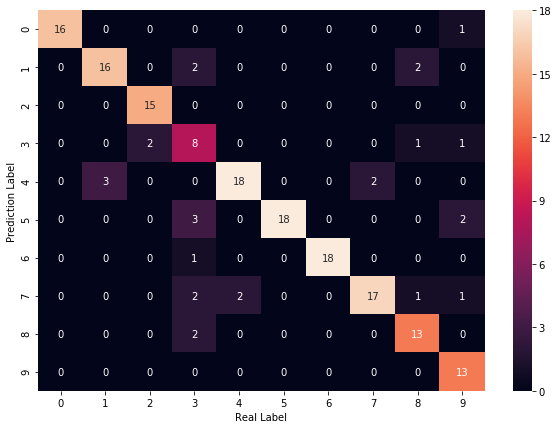

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:25 index:[5] real:5
#1 min_error:28 index:[3] real:2
#2 min_error:25 index:[8] real:8
#3 min_error:7 index:[0] real:0
#4 min_error:25 index:[1] real:1
#5 min_error:15 index:[7] real:7
#6 min_error:10 index:[6] real:6
#7 min_error:23 index:[3] real:3
#8 min_error:10 index:[2] real:2
#9 min_error:27 index:[1] real:1
#10 min_error:30 index:[7] real:7
#11 min_error:28 index:[7] real:4
#12 min_error:12 index:[6] real:6
#13 min_error:23 index:[3] real:3
#14 min_error:26 index:[1] real:1
#15 min_error:25 index:[3] real:3
#16 min_error:29 index:[7] real:9
#17 min_error:22 index:[1] real:1
#18 min_error:21 index:[7] real:7
#19 min_error:7 index:[6] real:6
#20 min_error:29 index:[1] real:8
#21 min_error:12 index:[4] real:4
#22 min_error:23 index:[3] real:3
#23 min_error:28 index:[1 4] real:1
#24 min_error:11 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:12 index:[5] real:5
#27 min_error:19 index:[3] real:3
#28 min_error:23 index:[6] real:6
#29 min_error:23 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9103277674706246
Avg Base Learner:0.8074644403215833


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2050 Total connections::2359


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334